In [ ]:
#installing the dependencies
# we are using torch implementation of yolo v5
!pip install tensorflow==2.3.1

!pip install tensorboard==2.4.1
!pip install torch  

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.14.0rc0, 2.14.0rc1)
ERROR: No matching distribution found for tensorflow==2.3.1


In [ ]:
import torch 
from IPython.display import Image 

In [ ]:
!git clone https://github.com/ultralytics/yolov5
#cloning the official yolo v5 github repo to our project
%cd yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
# installin roboflow package. Need to restart runtime after this
!pip install roboflow

In [ ]:
#importing dataset from roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7QNiL1B5kbQBsX5Oc39e")
project = rf.workspace("aizen").project("og_dataset_final")
dataset = project.version(2).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to og_dataset_final-2 in yolov5pytorch:: 100%|██████████| 5190/5190 [00:01<00:00, 4441.86it/s]


In [ ]:
# labelling the paths
trainimagePath = '/content/yolov5/og_dataset-1/train/images'
trainlabelPath = '/content/yolov5/og_dataset-1/train/labels'
valimagePath = '/content/yolov5/og_dataset-1/valid/images'
vallabelPath = '/content/yolov5/og_dataset-1/valid/labels'

# Training the model





In [ ]:
!python train.py --img 640 --batch 64 --epochs 100 --data /content/yolov5/og_dataset_final-2/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/og_dataset_final-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hs

In [ ]:
# validating the dataset
!python val.py --data /content/yolov5/og_dataset_final-2/data.yaml --weights runs/train/exp/weights/best.pt

val: data=/content/yolov5/og_dataset_final-2/data.yaml, weights=['runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-224-g6262c7f Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7037095 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolov5/og_dataset_final-2/valid/labels... 159 images, 0 backgrounds, 0 corrupt: 100% 159/159 [00:00<00:00, 487.34it/s]
val: New cache created: /content/yolov5/og_dataset_final-2/valid/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:05<00:00,  1.11s/it]
                   all        159        219      0.973       0.98      0.994      0.798
   

In [ ]:
# tensorboard to review the training metrics
%reload_ext tensorboard
%tensorboard --logdir runs

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "/usr/local/bin/tensorboard", line 5, in <module>
    from tensorboard.main import run_main
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/main.py", line 43, in <module>
    from tensorboard import default
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/default.py", line 36, in <module>
    from tensorboard.plugins.audio import audio_plugin
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/plugins/audio/audio_plugin.py", line 25, in <module>
    from tensorboard import plugin_util
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/plugin_util.py", line 23, in <module>
    from tensorboard._vendor.bleach.sanitizer import Cleaner
  File "/usr/local/lib/python3.10/dist-packages/tensorboard/_vendor/bleach/__init__.py", line 5, in <module>
    from tensorboard._vendor.bleach.linkifier import (
  File "/usr/local/lib/python3.10/dist-pa

In [ ]:
!zip -r /content/yolov5resultstest.zip /content/yolov5/runs/val/exp

  adding: content/yolov5/runs/val/exp/ (stored 0%)
  adding: content/yolov5/runs/val/exp/PR_curve.png (deflated 16%)
  adding: content/yolov5/runs/val/exp/R_curve.png (deflated 9%)
  adding: content/yolov5/runs/val/exp/val_batch2_labels.jpg (deflated 12%)
  adding: content/yolov5/runs/val/exp/val_batch0_pred.jpg (deflated 13%)
  adding: content/yolov5/runs/val/exp/confusion_matrix.png (deflated 21%)
  adding: content/yolov5/runs/val/exp/F1_curve.png (deflated 9%)
  adding: content/yolov5/runs/val/exp/val_batch1_pred.jpg (deflated 12%)
  adding: content/yolov5/runs/val/exp/val_batch2_pred.jpg (deflated 11%)
  adding: content/yolov5/runs/val/exp/val_batch0_labels.jpg (deflated 13%)
  adding: content/yolov5/runs/val/exp/val_batch1_labels.jpg (deflated 12%)
  adding: content/yolov5/runs/val/exp/P_curve.png (deflated 11%)


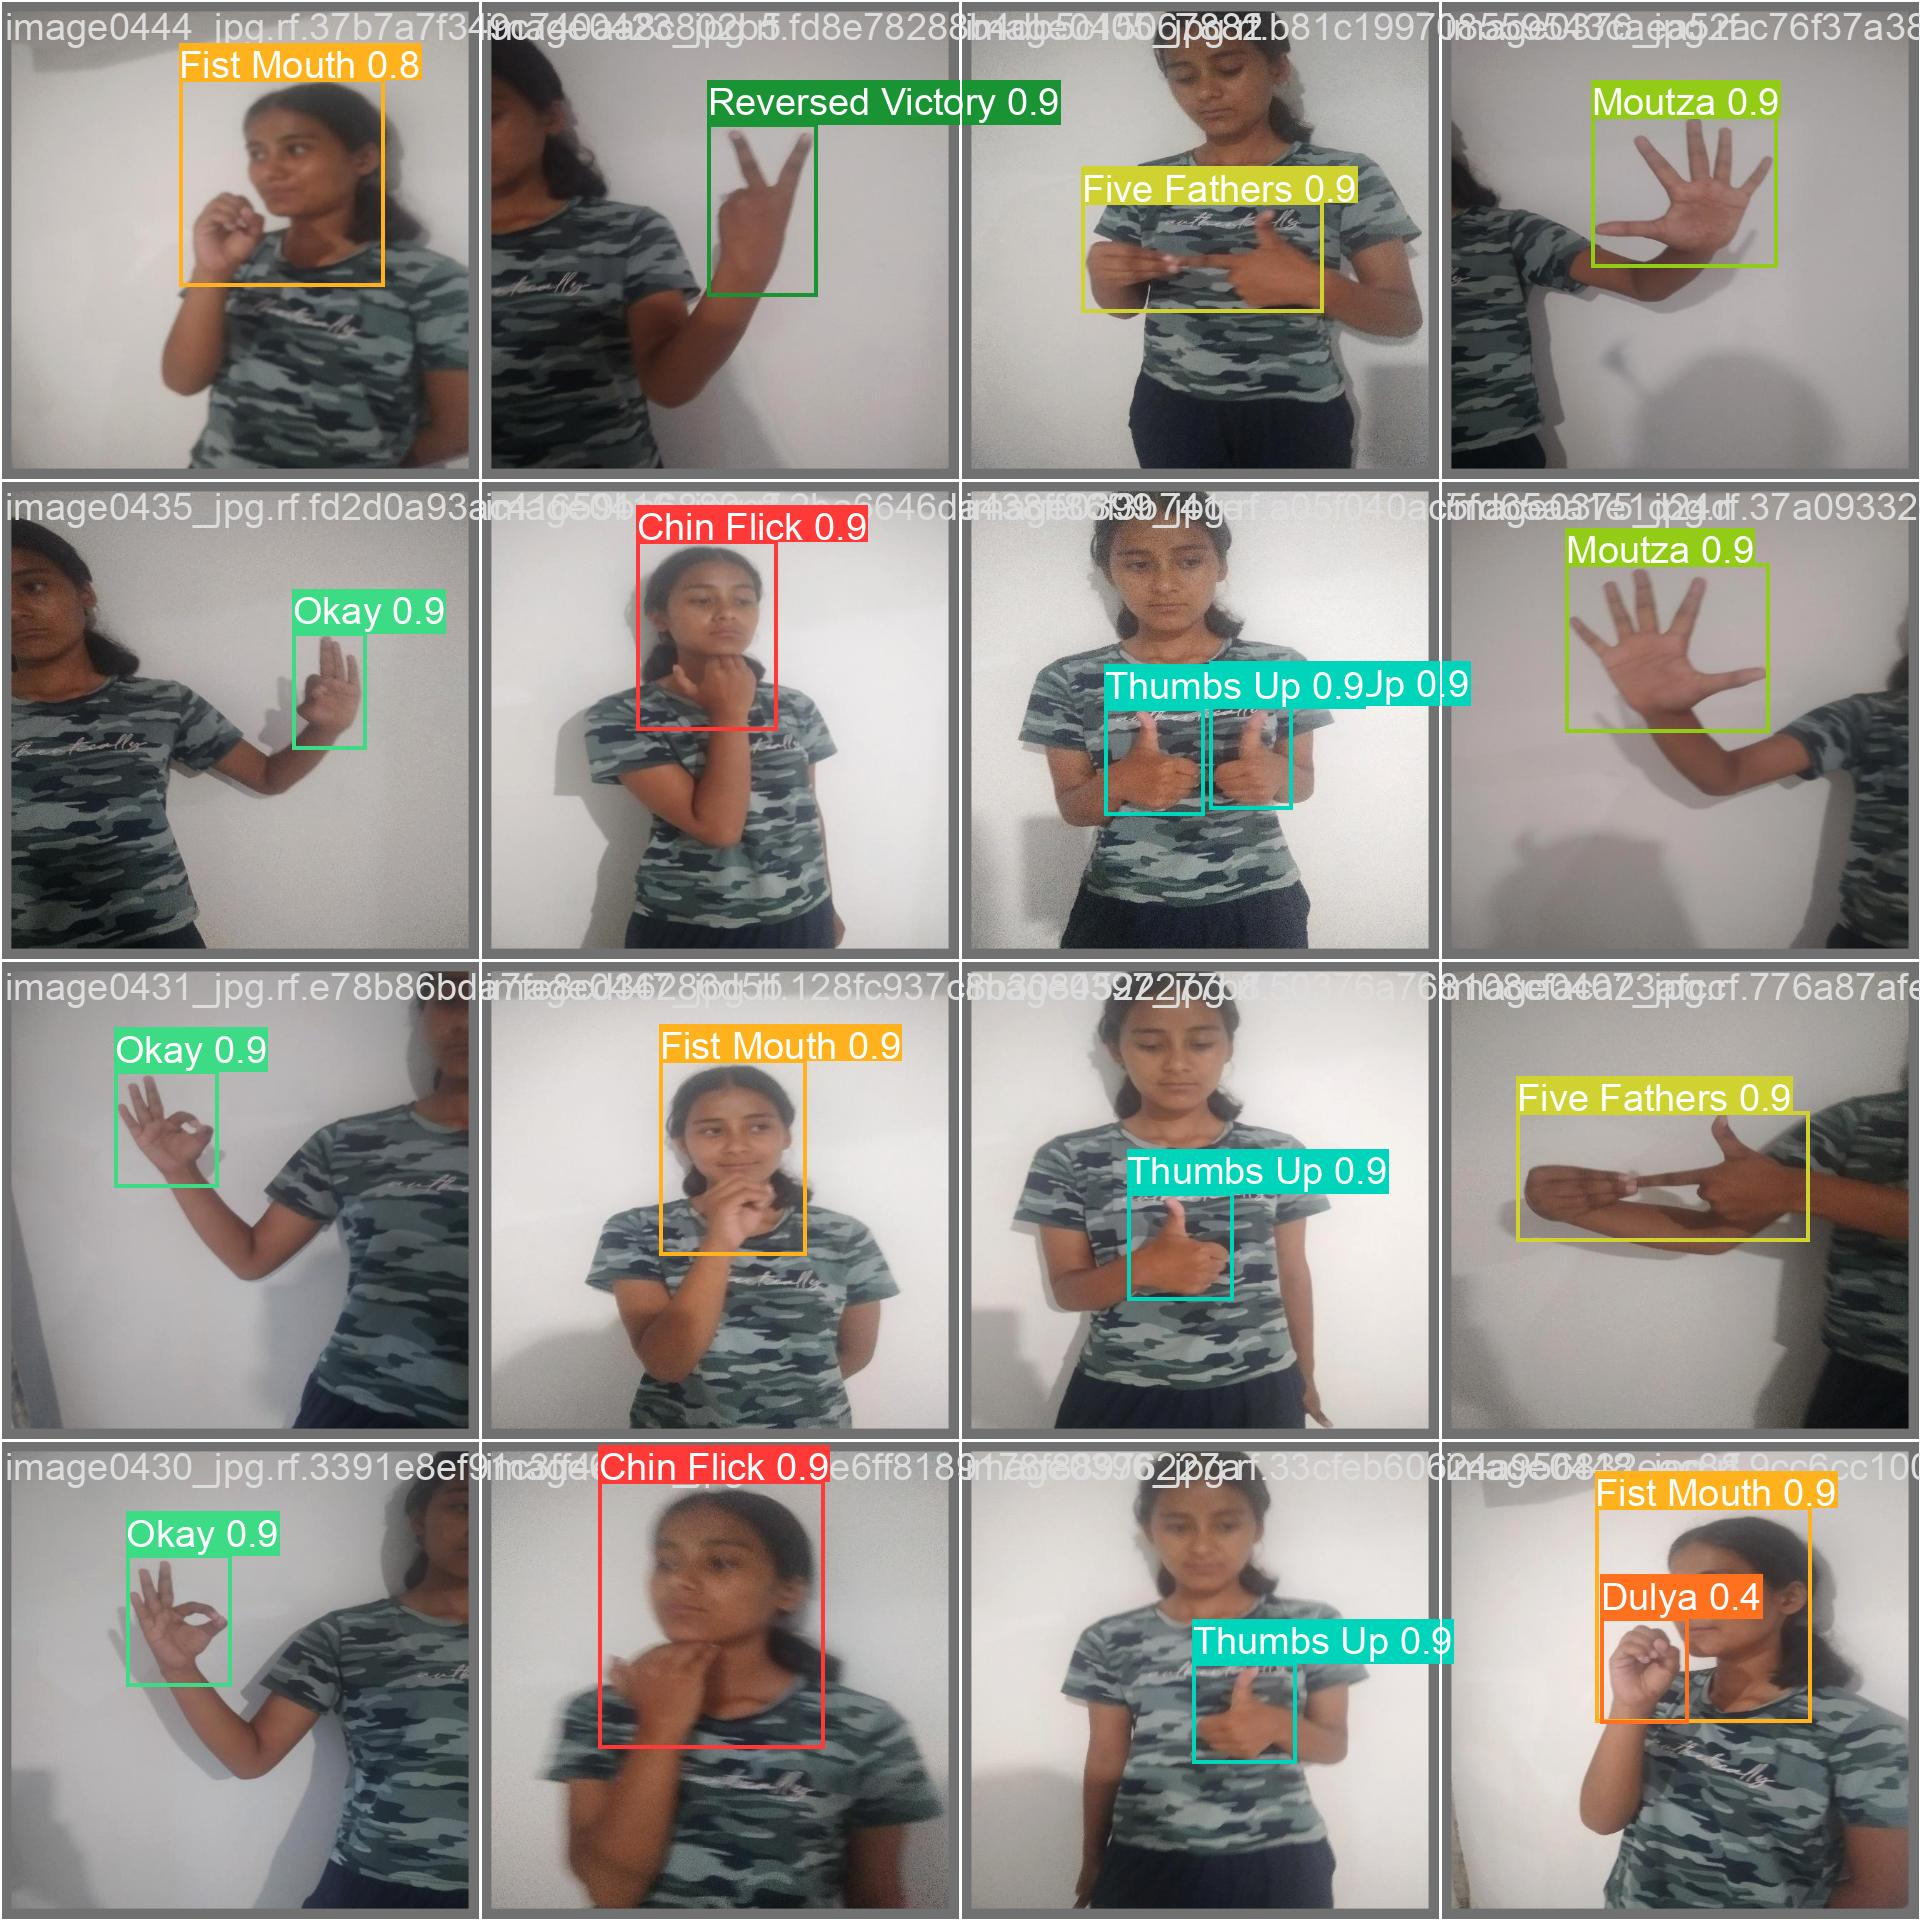

In [ ]:
# training results saved in output folder
Image(filename='runs/train/exp/val_batch2_pred.jpg', width=1000)
